#MLP

##1. Import Library

In [220]:
import numpy as np
import pandas as pd
import random 
import seaborn 
import matplotlib.pyplot as plt
import matplotlib.cm as cm #UNTUK PEMILIHAN WARNA

from matplotlib.pyplot import figure

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics

from keras import models
from keras import layers
from tensorflow.keras.utils import to_categorical
from sklearn.neural_network import MLPClassifier

##2. Data Understanding

## 2.1 Import Data

In [221]:
abalone = pd.read_csv("abalone.csv")

abalone.head(501)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,11.8,0.38,0.55,2.1,0.071,5.0,19.0,0.9986,3.11,0.62,10.8,6,699
497,10.6,1.02,0.43,2.9,0.076,26.0,88.0,0.9984,3.08,0.57,10.1,6,700
498,7.0,0.65,0.02,2.1,0.066,8.0,25.0,0.9972,3.47,0.67,9.5,6,701
499,7.0,0.64,0.02,2.1,0.067,9.0,23.0,0.9970,3.47,0.67,9.4,6,702


## 2.2 Data Description

In [222]:
print(abalone.describe())

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1143.000000       1143.000000  1143.000000     1143.000000   
mean        8.311111          0.531339     0.268364        2.532152   
std         1.747595          0.179633     0.196686        1.355917   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.392500     0.090000        1.900000   
50%         7.900000          0.520000     0.250000        2.200000   
75%         9.100000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1143.000000          1143.000000           1143.000000  1143.000000   
mean      0.086933            15.615486             45.914698     0.996730   
std       0.047267            10.250486             32.782130     0.001925   
min       0.012000             1.000000         

## Split Data

In [ ]:
X = abalone.loc[:1000, ["fixed acidity","Diameter","Height","Whole_weight","Shucked_weight","Viscera_weight","Shell_weight","Rings"]] #menginisialisasikan data
y = abalone.Sex  #kolom target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=1)
X

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


##3. Plotting Data

Text(0.5, 1.0, 'Shell Weight & Rings')

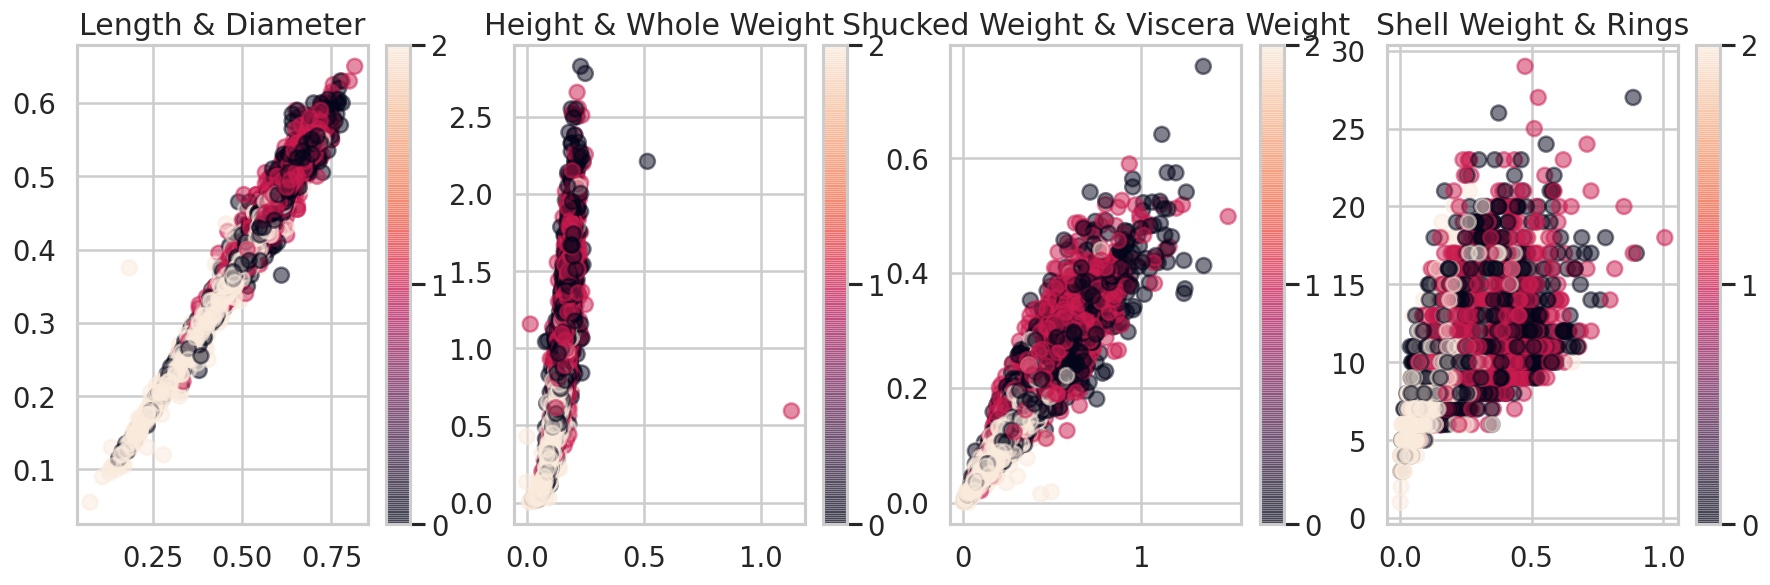

In [ ]:
n_sample = X.shape
n_feature = y.shape

figure(figsize=(18, 18), dpi=60) #dpi= ukuran figure yang ditampilkan

plt.subplot(3, 4, 1) #jumlah kotak yg ingin ditampilkan kebawah dan kesamping, 1 adalah index
scatter_plot = plt.scatter(abalone.Length, abalone.Diameter, alpha=0.5, c=abalone.Sex) #alpha transparasi titik yang akan ditampilkan 

plt.colorbar(ticks = ([0,1,2])) #tick bar yang disamping M0 F1 I2
plt.title("Length & Diameter")

plt.subplot(3, 4, 2)
scatter_plot = plt.scatter(abalone.Height, abalone.Whole_weight, alpha=0.5, c=abalone.Sex)

plt.colorbar(ticks = ([0,1,2]))
plt.title("Height & Whole Weight")

plt.subplot(3, 4, 3)
scatter_plot = plt.scatter(abalone.Shucked_weight, abalone.Viscera_weight, alpha=0.5, c=abalone.Sex)

plt.colorbar(ticks = ([0,1,2]))
plt.title("Shucked Weight & Viscera Weight")

plt.subplot(3, 4, 4)
scatter_plot = plt.scatter(abalone.Shell_weight, abalone.Rings, alpha=0.5, c=abalone.Sex)

plt.colorbar(ticks = ([0,1,2]))
plt.title("Shell Weight & Rings")



## Plot of Distribution Data

In [ ]:
from pandas.plotting import scatter_matrix

scatter_matrix(abalone, alpha=0.8, figsize=(80,80))
plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
abalone.plot(subplots=True, figsize=(25,50), sharex=False, sharey=False)
plt.show()

Output hidden; open in https://colab.research.google.com to view.

## Split Data

## Implementasi MLP

### Optimizer Adam

In [ ]:
clf = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(3, 3), random_state=1)
clf.fit(X_train, y_train)

###Prediction

In [ ]:
prediction = clf.predict(X_test)
print(prediction)

[0 2 0 0 2 0 1 2 2 0 0 1 0 1 0 2 0 2 0 0 1 0 0 1 0 2 2 2 2 0 1 2 2 0 0 0 0
 0 0 2 0 2 2 0 2 0 1 0 2 0 0 0 2 0 1 2 2 0 0 0 0 0 2 2 0 0 0 2 0 2 2 0 0 0
 2 1 2 0 0 1 1 2 1 0 0 0 0 0 0 2 0 2 0 0 0 2 2 2 0 1 0 0 0 0 0 0 2 0 2 2 2
 0 2 0 2 2 0 0 0 0 0 0 0 0 0 0 2 1 0 0 0 0 0 0 2 2 0 0 1 0 1 2 2 1 0 0 0 0
 0 2 0 0 0 0 0 0 0 0 2 1 1 0 1 2 0 0 0 0 2 0 2 0 2 2 2 2 0 2 0 2 2 2 2 2 0
 0 0 0 2 0 2 0 0 2 2 2 0 0 0 2 2 2 2 2 1 0 2 2 0 2 0 2 0 0 2 2 0 0 2 2 2 2
 2 0 1 1 0 2 2 2 0 0 0 0 0 2 1 0 1 2 1 2 0 0 0 2 0 2 0 1 0 0 0 2 2 1 0 0 2
 2 0 2 0 1 0 0 2 2 0 2 0 0 2 0 0 2 0 0 0 2 1 0 0 0 2 2 2 0 2 0 2 0 0 2 1 1
 0 2 2 1 0 0 0 2 0 2 2 2 0 0 2 0 0 0 1 2 2 0 0 2 2 0 2 0 0 0 1 0 0 1 0 2 0
 0 0 0 1 2 0 2 2 0 1 0 0 2 0 0 0 2 2 0 2 0 0 2 1 0 2 0 1 0 0 0 2 0 2 0 2 1
 0 0 0 0 2 0 0 2 2 0 0 2 0 2 0 0 2 0 2 0 2 2 2 2 0 0 2 0 0 2 0 1 2 2 0 0 0
 0 0 0 2 0 0 2 2 2 0 2 1 0 0 1 2 0 0 0 0 2 2 2 0 0 0 0 0 2 2 0 1 2 0 2 2 1
 0 0 2 0 2 0 0 0 2 2 2 0 0 0 2 2 1 2 0 0 1 2 2 0 0 0 0 2 2 0 2 2 0 2 0 0 1
 0 1 0 0 0 2 0 1 2 2 0 0 

In [ ]:
train_labels = to_categorical(y_train)
test_labels = to_categorical(y_test)

In [ ]:
clf = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(3, 3), random_state=1)

In [ ]:
clf.fit(X_train, y_train)

In [ ]:
prediction = clf.predict(X_test)
print(prediction)

In [ ]:
print(y_test)

In [ ]:
print('The accuracy of the Multi-layer Perceptron is:',metrics.accuracy_score(prediction,y_test))

In [ ]:
mymodel = models.Sequential()
mymodel.add(layers.Dense(32, activation='relu', input_shape=(4,)))
mymodel.add(layers.Dense(64, activation='relu'))
mymodel.add(layers.Dense(128, activation='relu'))
mymodel.add(layers.Dense(3, activation='softmax'))

In [ ]:
mymodel.compile(optimizer='sgd',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [ ]:
mymodel.fit(X_train, train_labels, epochs=20, batch_size=40)

In [ ]:
test_loss, test_acc = mymodel.evaluate(X_test, test_labels)
print('Test Accuracy: ', test_acc, '\nTest Loss: ', test_loss)